In [1]:
# Add root dir to sys.path
import sys
from pathlib import Path

# print(Path.cwd().parent)
sys.path.append(str(Path.cwd().parent))  # or adjust as needed

import numpy as np
import pandas as pd


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from src.core.backprop import BackProp
from src.core.layers import NeuNet
from src.core.feed_forward import FeedForward
from src.core.learner import Learner
from src.utils.loss_functions import binary_cross_entropy, mean_squared_error
from src.utils.data_randomize import df_random
from src.utils.data_split import train_test_split

# resolve paths
# curr_script_path = Path.cwd()
curr_folder_path = Path.cwd()
root_folder_path = curr_folder_path.parent
# root_folder_path = curr_folder_path.parent
data_folder = root_folder_path / "data/data_to_test"

rand_df = df_random(pd.read_csv(str(data_folder)+"/binary_classification_data_4_f.csv"))
# rand_df_tr = df_random(pd.read_csv(str(data_folder)+"/mnist_train.csv"))
# rand_df = pd.read_csv(str(data_folder)+"/binary_classification_data.csv")
# tr_data, test_data = train_test_split(rand_df, 0.8)
tr_data = rand_df

In [3]:
# pd.read_csv(str(data_folder)+"/mnist_train.csv")
rand_df

,Unnamed: 0,x_0,x_1,x_2,x_3,y
93,93,0.488320,-0.584047,-0.530008,-0.808237,0.0
167,167,1.603441,2.308443,2.539597,2.009640,1.0
62,62,-0.406573,0.474710,-0.298157,0.465924,0.0
152,152,2.231565,2.471234,2.158580,2.224098,1.0
85,85,0.947945,-0.801029,0.304422,-0.828358,0.0
...,...,...,...,...,...,...
190,190,1.485032,2.271656,2.165288,1.621065,1.0
2,2,0.489369,-0.635242,0.549830,-0.059082,0.0
175,175,2.497197,1.818071,2.196531,1.104336,1.0
124,124,1.934947,2.121059,1.812426,1.199082,1.0


In [4]:
tr_data.shape

(200, 6)

In [5]:
a = np.array([[1, 2, 3]])
a.shape

(1, 3)

In [6]:
tr_X = tr_data.iloc[:, 1:5]
tr_X = np.array(tr_X)
tr_y = tr_data.iloc[:, -1]
tr_y = np.array(tr_y)
tr_y = tr_y.reshape(tr_y.shape[0], 1)

In [7]:
# test_y

In [8]:
test_X = test_data.iloc[:, 1:5]
test_X = np.array(test_X)
test_y = test_data.iloc[:, -1]
test_y = np.array(test_y)
test_y = test_y.reshape(test_y.shape[0], 1)

NameError: name 'test_data' is not defined

In [ ]:
test_X.shape

NameError: name 'test_X' is not defined

In [ ]:
tr_X.shape
len(tr_X)

200

In [16]:


net = NeuNet(tr_X, tr_y)
net.input_layer()
net.add_hidden_layer(2, "sigmoid")
# net.add_hidden_layer(2, "sigmoid")
net.output_layer(1, "sigmoid")
net.initialize_weights()

ff = FeedForward(net)
bp = BackProp(forward_pass=ff, learning_rate=0.0001, loss_function="binary_cross_entropy")
epoch = 900
tr = Learner(backprop=bp, epoch=epoch)
loss = tr.train()


INFO:root:Loss - 0.7173855490585207


INFO:root:Epoch: 0 - Average Loss: 0.7173855490585207
INFO:root:Loss - 0.7174650701982533
INFO:root:Epoch: 1 - Average Loss: 0.7174650701982533
INFO:root:Loss - 0.7176091322240805
INFO:root:Epoch: 2 - Average Loss: 0.7176091322240805
INFO:root:Loss - 0.7178160429006383
INFO:root:Epoch: 3 - Average Loss: 0.7178160429006383
INFO:root:Loss - 0.7180841599771831
INFO:root:Epoch: 4 - Average Loss: 0.7180841599771831
INFO:root:Loss - 0.7184118884480525
INFO:root:Epoch: 5 - Average Loss: 0.7184118884480525
INFO:root:Loss - 0.7187976780640952
INFO:root:Epoch: 6 - Average Loss: 0.7187976780640952
INFO:root:Loss - 0.7192400210699976
INFO:root:Epoch: 7 - Average Loss: 0.7192400210699976
INFO:root:Loss - 0.7197374501446875
INFO:root:Epoch: 8 - Average Loss: 0.7197374501446875
INFO:root:Loss - 0.7202885365240487
INFO:root:Epoch: 9 - Average Loss: 0.7202885365240487
INFO:root:Loss - 0.7208918882871473
INFO:root:Epoch: 10 - Average Loss: 0.7208918882871473
INFO:root:Loss - 0.721546148788978
INFO:root:

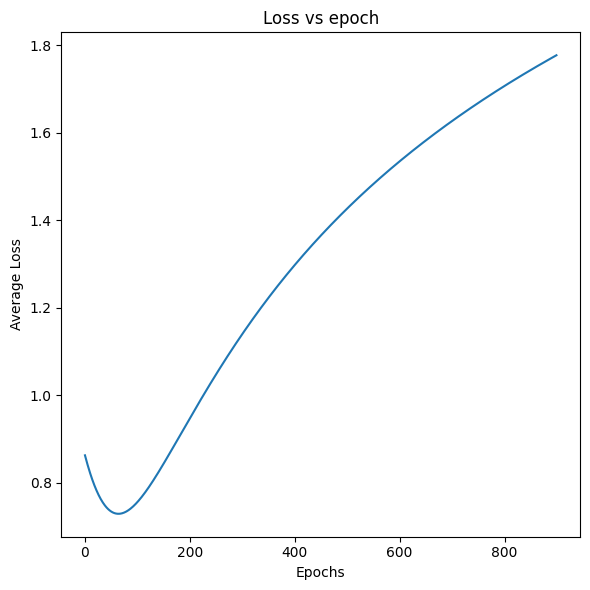

In [14]:
tr.plot_loss()


In [9]:
tr.binary_classification_accuracy(test_data=tr_X, test_label=tr_y)
# tr_X

np.float64(0.5)

In [12]:
from math import ceil

ceil(300* 0.667)

201

In [11]:
300* 0.667

200.10000000000002

In [8]:
rand_df

,Unnamed: 0,x_0,x_1,x_2,x_3,y
192,192,2.550142,1.890229,1.248802,1.551300,1.0
146,146,2.228708,2.539099,2.514468,2.005175,1.0
91,91,0.611223,0.133525,-0.240514,-0.111338,0.0
124,124,1.934947,2.121059,1.812426,1.199082,1.0
151,151,2.410124,2.048161,0.839703,1.169201,1.0
...,...,...,...,...,...,...
60,60,-0.336230,-0.249016,-0.594430,0.349229,0.0
12,12,0.380519,-0.430613,0.393164,-0.563413,0.0
138,138,2.400282,1.898552,2.410161,1.947828,1.0
47,47,0.388745,0.558508,0.539809,0.078352,0.0


In [9]:
from src.utils.data_split import train_test_split

tr_Data, test_data = train_test_split(rand_df, 0.7)

In [20]:
tr_Data, test_data = train_test_split(rand_df, 0.59)

ValueError: The value must be between 0.6 and 0.9. Provided 0.59.